In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
ANNOTATION_PATH= Path.cwd().parent / "data/processed/classification/annotations.csv"

In [4]:
data = pd.read_csv(ANNOTATION_PATH)
display(data.head())

,image_path,patient_id,ivd_level,series_type,source,pfirrmann_grade,disc_herniation,disc_narrowing,disc_bulging,spondylolisthesis,modic,up_endplate,low_endplate
0,images/phenikaa_250010139_sag_t1_L1.png,250010139,1,sag_t1,phenikaa,2,0,0,0,0,0,0,0
1,images/phenikaa_250010139_sag_t1_L2.png,250010139,2,sag_t1,phenikaa,2,0,0,0,0,0,0,0
2,images/phenikaa_250010139_sag_t1_L3.png,250010139,3,sag_t1,phenikaa,2,0,0,0,0,0,0,0
3,images/phenikaa_250010139_sag_t1_L4.png,250010139,4,sag_t1,phenikaa,2,0,0,0,0,0,0,0
4,images/phenikaa_250010139_sag_t1_L5.png,250010139,5,sag_t1,phenikaa,2,0,0,0,0,0,0,0


# Label Distribution

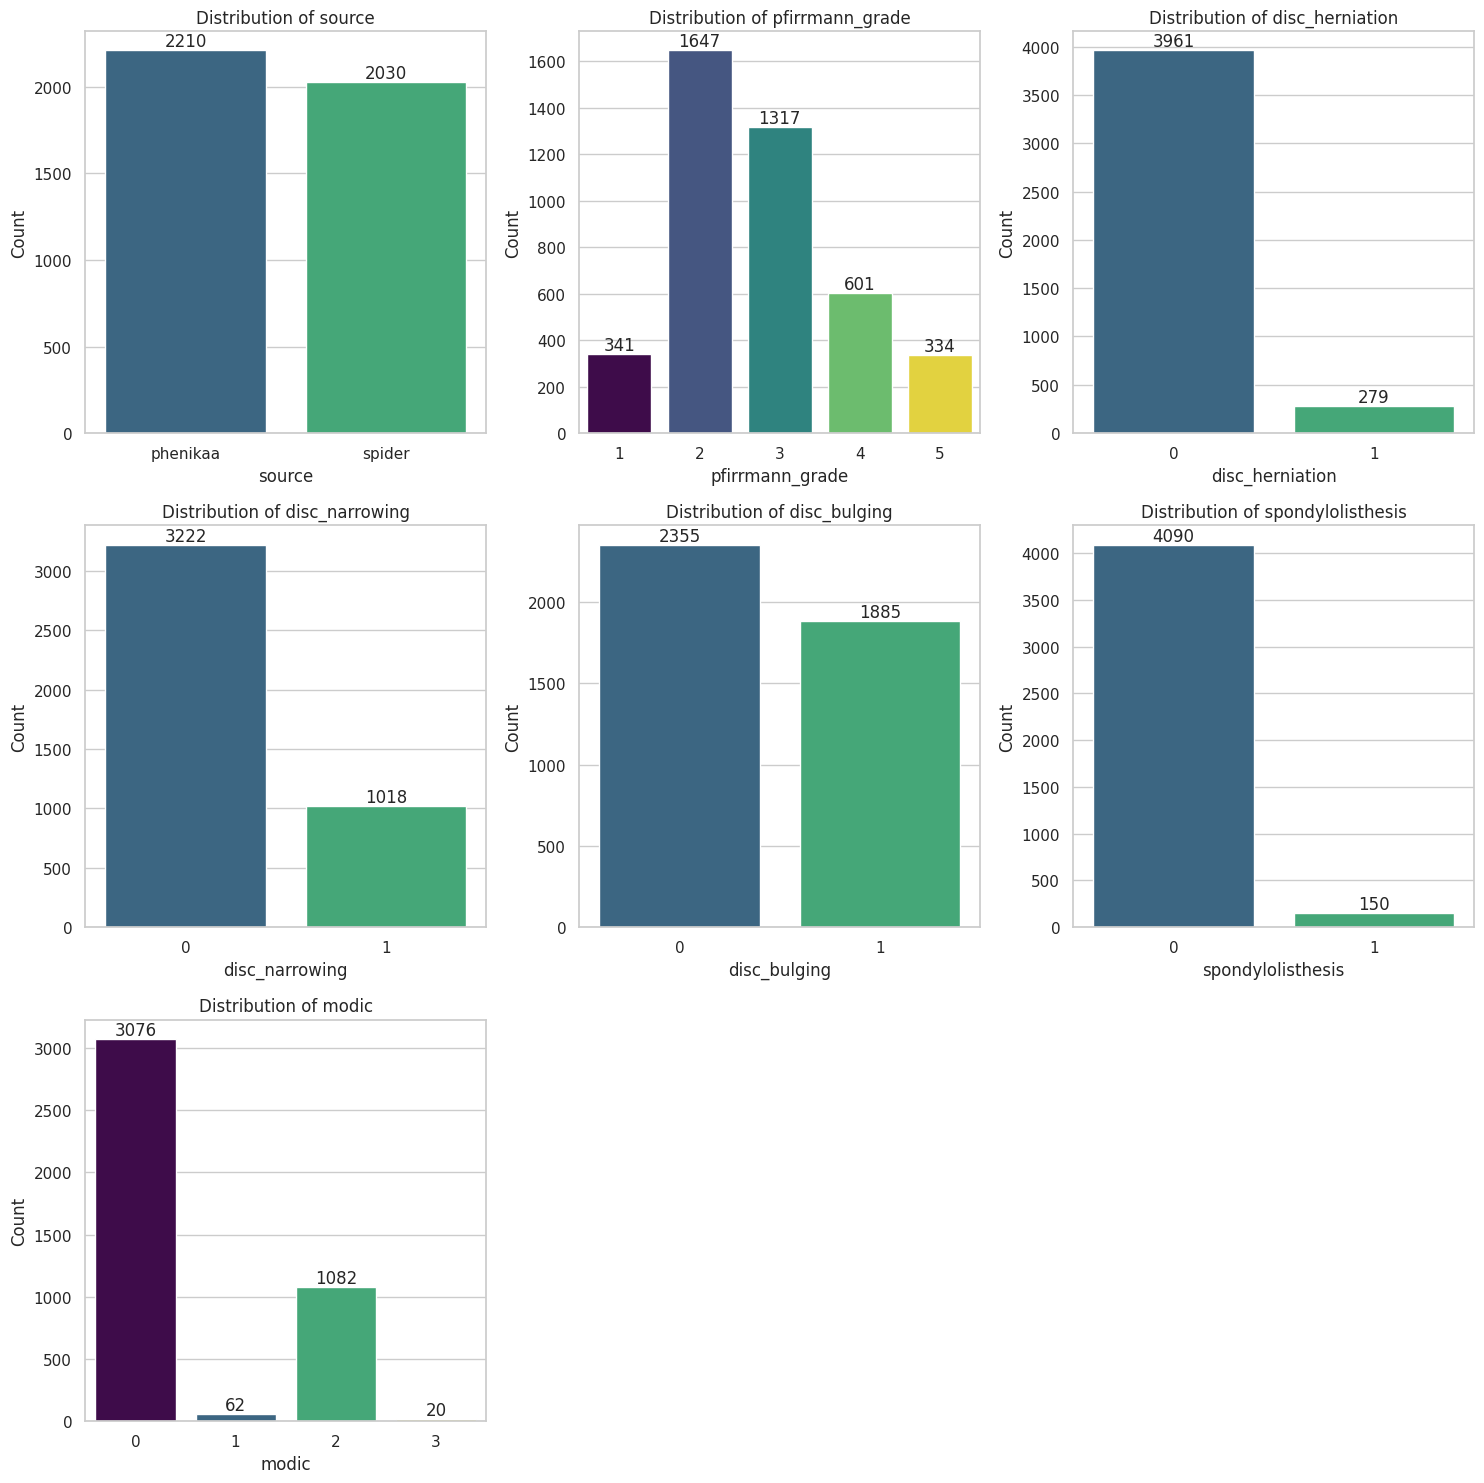

In [5]:
columns_to_exclude = ['patient_id', 'ivd_level', 'image_path', 'up_endplate', 'low_endplate', 'series_type']
plot_columns = [col for col in data.columns if col not in columns_to_exclude]

n_cols = 3
n_rows = (len(plot_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(plot_columns):
    sns.countplot(data=data, x=col, hue=col, legend=False, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

    for container in axes[i].containers:
        axes[i].bar_label(container)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation Matrix

## 1. Modic

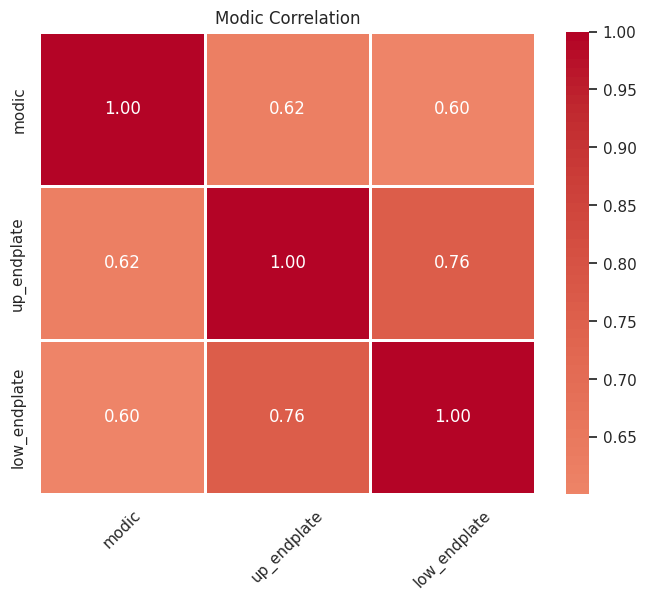

In [6]:
modic_group_cols = ['modic', 'up_endplate', 'low_endplate']
modic_corr_matrix = data[modic_group_cols].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(modic_corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt=".2f", 
            linewidths=1, 
            linecolor='white',)

plt.title('Modic Correlation')
plt.tick_params(axis='x', rotation=45)

## 2. General

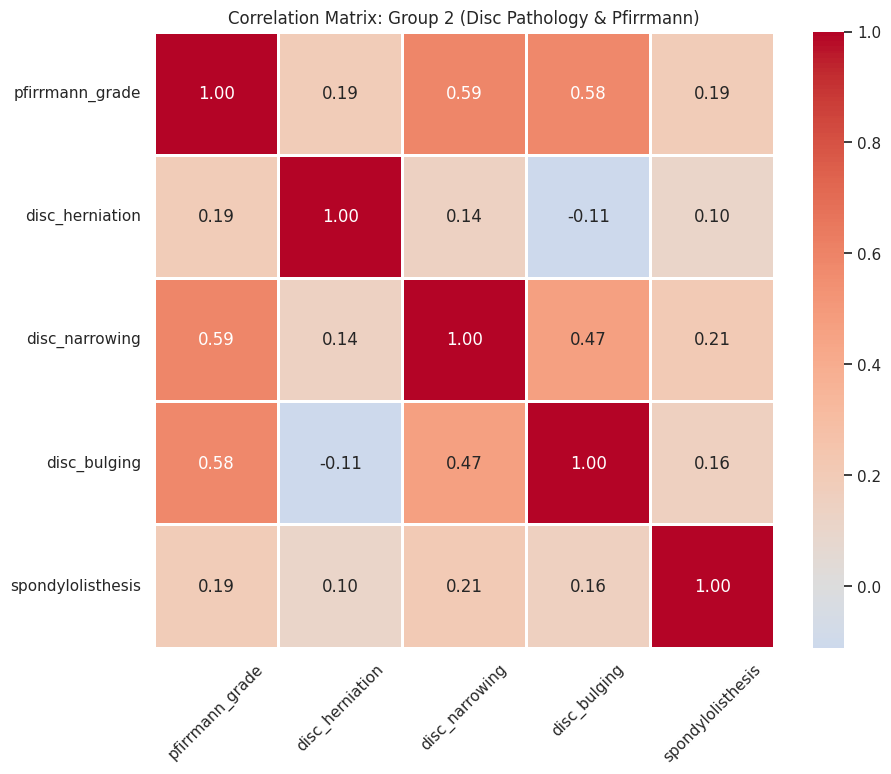

In [7]:
columns_to_exclude = columns_to_exclude + ['series_type', 'source']

general_group_cols = [col for col in data.columns if col not in modic_group_cols and col not in columns_to_exclude]

general_corr_matrix = data[general_group_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(general_corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt=".2f", 
            linewidths=1, 
            linecolor='white')

plt.title('Correlation Matrix: Group 2 (Disc Pathology & Pfirrmann)')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()